In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [67]:
#Ingresar por usuario menú

print("Por favor ingrese el valor de la latidud siendo positiva norte y negativa al sur (grados)")
latitud = float(input())

print("Ingrese la inclinación alpha del instrumento (grados)")
alpha = float (input())

print("Ingrese la inclinación beta del instrumento (grados)")
beta = float(input())

print("ingrese el día solar (1-365)")
dia = float(input())

#Constantes

rad = np.pi/180
B0 = 1367   #Cte solar
E0 = 1+0.033*np.cos((360/365)*dia)
declinacion = (23.45)*np.sin((360/365)*(dia+284))


w = np.zeros(1440)
theta_s = np.zeros(1440)
am = np.zeros(1440)
AM = np.zeros(1440)
G = np.zeros(1440)
tiempo_real = np.zeros(1440)



for i in range(0,1440):
    
    w[i] = 0.25*(i-720)
    tiempo_real[i] = i/60
    
    if latitud >= 0:
        theta_s[i] = np.sin(declinacion*rad)*np.sin(latitud*rad)*np.cos(beta*rad)-(np.sin(declinacion*rad)*np.cos(latitud*rad)*np.sin(beta*rad)*np.cos(alpha*rad))+(np.cos(declinacion*rad)*np.cos(latitud*rad)*np.cos(beta*rad)*np.cos(w[i]*rad))+(np.cos(declinacion*rad)*np.sin(latitud*rad)*np.sin(beta*rad)*np.cos(alpha*rad)*np.cos(w[i]*rad))+np.cos(declinacion*rad)*np.sin(alpha*rad)*np.sin(w[i]*rad)*np.sin(beta*rad);
    else:
        theta_s[i] = np.sin(declinacion*rad)*np.sin(latitud*rad)*np.cos(beta*rad)+np.sin(declinacion*rad)*np.cos(latitud*rad)*np.sin(beta*rad)*np.cos(alpha*rad)+np.cos(declinacion*rad)*np.cos(latitud*rad)*np.cos(beta*rad)*np.cos(w[i]*rad)-np.cos(declinacion*rad)*np.sin(latitud*rad)*np.sin(beta*rad)*np.cos(alpha*rad)*np.cos(w[i]*rad)+np.cos(declinacion*rad)*np.sin(alpha*rad)*np.sin(w[i]*rad)*np.sin(beta*rad);
    
    
    am[i] = (np.sin(declinacion*rad)*np.sin(latitud*rad)+np.cos(declinacion*rad)*np.cos(latitud*rad)*np.cos(w[i]*rad))
    AM[i] = 1/(am[i])
    G[i] = (B0*E0*0.7**(AM[i]**0.675))*theta_s[i]
    
    if np.isnan(G[i]) or G[i] < 0:
        G[i]=0

        
print(G[720])

Por favor ingrese el valor de la latidud siendo positiva norte y negativa al sur (grados)
4.35
Ingrese la inclinación alpha del instrumento (grados)
12.5
Ingrese la inclinación beta del instrumento (grados)
7
ingrese el día solar (1-365)
79
929.217723006389


C:\Users\Will0\AppData\Local\Temp/ipykernel_3364/1254525084.py:45: RuntimeWarning: invalid value encountered in double_scalars
  G[i] = (B0*E0*0.7**(AM[i]**0.675))*theta_s[i]


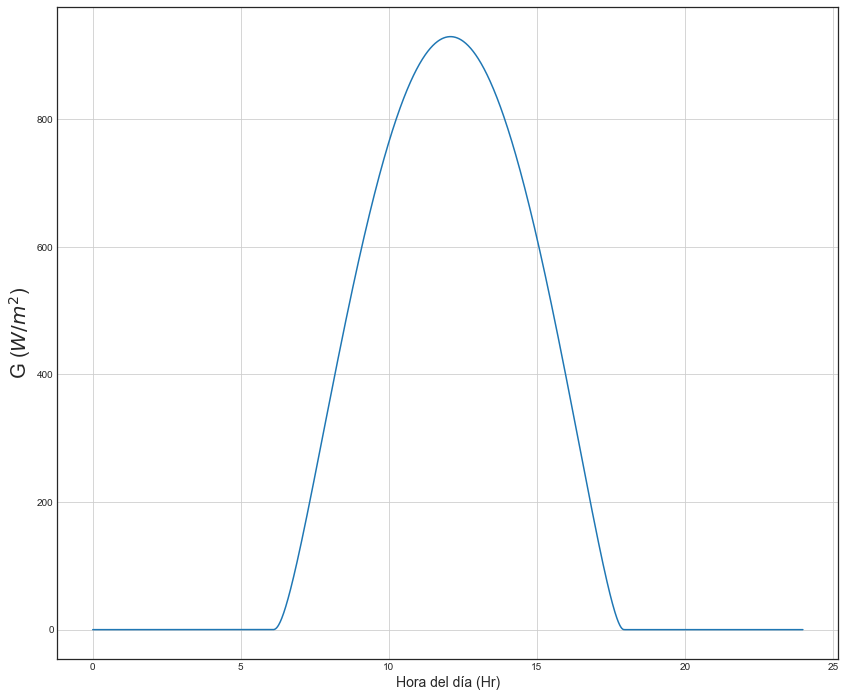

In [68]:
plt.style.use(['seaborn-white'])

fig,(ax)=plt.subplots(1)
fig.set_size_inches(14,12)

ax.plot(tiempo_real,G,)


ax.set_ylabel(r'G ($W/m^2$)',fontsize=20)
ax.set_xlabel(r'Hora del día (Hr)',fontsize=14)
ax.grid(True)
plt.savefig('irradiacion.png')